# GROUP C

# DATA ANALYSIS OF UACE RESULTS 2011-2015

In [14]:
################ CRONNIE ################

# import pandas
import pandas as pd
import warnings
from IPython.core.display import display, HTML

# Suppressing warnings (optional)
warnings.filterwarnings('ignore')

In [15]:
# Styles for tables to be used in the notebook
# custom CSS styles for tables
table_styles = """
<style>
    /* Change background color of header row */
    th {
        background-color: #2c3e50;
    }
    /* Change background color of even rows */
    tr:nth-child(even) {
        background-color: #34495e;
    }
    /* Change background color of odd rows */
    tr:nth-child(odd) {
        background-color: #2c3e50;
    }
    /* Change text color of all cells */
    td {
        color: white;
    }
</style>
"""

# Apply the custom CSS styles to the table
display(HTML(table_styles))

## Data Cleaning


In [16]:
# read csv file
results_df = pd.read_csv("./UaceResults2011-2015.csv")

results_df.head(5)

,District_Name,SCHOOL,Gender,2011 Total,%0-5 Points,%6-10 Points,%11-15 Points,%16-20 Points,%21-25 Points,2012 Total,...,2014 Total,%0-5 Points.3,%6-10 Points.3,%11-15 Points.3,%16-20 Points.3,2015 Total,%0-5 Points.4,%6-10 Points.4,%11-15 Points.4,%16-20 Points.4
0,AMUDAT,POKOT SECONDARY SCHOOL,FEMALE,NaN,0.0,0.0,0.0,0.0,0.0,3.0,...,2.0,50.0,0.0,50.0,0.0,1,0.0,0.0,100.0,0.0
1,AMUDAT,NaN,MALE,NaN,0.0,0.0,0.0,0.0,0.0,8.0,...,9.0,55.6,44.4,0.0,0.0,4,25.0,50.0,25.0,0.0
2,AMUDAT Total,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,11.0,...,11.0,54.5,36.4,9.1,0.0,,20.0,40.0,40.0,0.0
3,PADER,ARCHBP.FLYNN SECONDARY SCHOOL,FEMALE,NaN,0.0,0.0,0.0,0.0,0.0,NaN,...,NaN,0.0,0.0,0.0,0.0,14,21.4,42.9,35.7,0.0
4,PADER,NaN,MALE,NaN,0.0,0.0,0.0,0.0,0.0,NaN,...,NaN,0.0,0.0,0.0,0.0,22,40.9,50.0,9.1,0.0


In [17]:
# discover null rows
print(results_df.isnull().sum())

District_Name         0
SCHOOL             1959
Gender              114
2011 Total         1240
%0-5 Points           0
%6-10 Points          0
%11-15 Points         0
%16-20 Points         0
%21-25 Points         0
2012 Total          985
%0-5 Points.1         0
%6-10 Points.1        0
%11-15 Points.1       0
%16-20 Points.1       0
%21-25 Points.1       0
2013 Total          553
%0-5 Points.2         0
%6-10 Points.2        0
%11-15 Points.2       0
%16-20 Points.2       0
2014 Total          358
%0-5 Points.3         0
%6-10 Points.3        0
%11-15 Points.3       0
%16-20 Points.3       0
2015 Total          295
%0-5 Points.4         0
%6-10 Points.4        0
%11-15 Points.4       0
%16-20 Points.4       0
dtype: int64


In [18]:
# Change school totals for schools with no students in a particular year to zeros
zero_school_total_columns = ['2011 Total', '2012 Total', '2013 Total', '2014 Total', '2015 Total']

results_df[zero_school_total_columns] =results_df[zero_school_total_columns].fillna(0.0)


In [19]:
# discover current null rows
print(results_df.isnull().sum())

District_Name         0
SCHOOL             1959
Gender              114
2011 Total            0
%0-5 Points           0
%6-10 Points          0
%11-15 Points         0
%16-20 Points         0
%21-25 Points         0
2012 Total            0
%0-5 Points.1         0
%6-10 Points.1        0
%11-15 Points.1       0
%16-20 Points.1       0
%21-25 Points.1       0
2013 Total            0
%0-5 Points.2         0
%6-10 Points.2        0
%11-15 Points.2       0
%16-20 Points.2       0
2014 Total            0
%0-5 Points.3         0
%6-10 Points.3        0
%11-15 Points.3       0
%16-20 Points.3       0
2015 Total            0
%0-5 Points.4         0
%6-10 Points.4        0
%11-15 Points.4       0
%16-20 Points.4       0
dtype: int64


In [20]:
######################## OJOK ###########################

# Handle misplaced schools
'''
Algorithm: If cell in 'SCHOOL' column is empty AND the entry is not for DISTRICT TOTAL ie cell for DISTRICT doesn't contain 'Total'
            THEN copy the SCHOOL before and paste it in the current SCHOOL cell.
'''
# Loop through the DataFrame and fill empty cells in the 'SCHOOL' column
previous_school = None

for index, row in results_df.iterrows():
    if pd.isnull(row['SCHOOL']):
        district_name = row['District_Name']
        # We make sure the previous school in the entry before isn't null so that we don't copy null values if present.
        if previous_school is not None and 'total' not in district_name.lower():
            results_df.at[index, 'SCHOOL'] = previous_school
    else:
        previous_school = row['SCHOOL']


In [21]:
# discover current null rows
print(results_df.isnull().sum())

District_Name        0
SCHOOL             112
Gender             114
2011 Total           0
%0-5 Points          0
%6-10 Points         0
%11-15 Points        0
%16-20 Points        0
%21-25 Points        0
2012 Total           0
%0-5 Points.1        0
%6-10 Points.1       0
%11-15 Points.1      0
%16-20 Points.1      0
%21-25 Points.1      0
2013 Total           0
%0-5 Points.2        0
%6-10 Points.2       0
%11-15 Points.2      0
%16-20 Points.2      0
2014 Total           0
%0-5 Points.3        0
%6-10 Points.3       0
%11-15 Points.3      0
%16-20 Points.3      0
2015 Total           0
%0-5 Points.4        0
%6-10 Points.4       0
%11-15 Points.4      0
%16-20 Points.4      0
dtype: int64


In [22]:
# Remove genderless entries that are not district totals

# Filter and remove entries where 'Gender' column is empty and 'District_Name' doesn't contain 'Total'
results_df = results_df[~(results_df['Gender'].isnull() & ~results_df['District_Name'].str.contains('Total', case=False))]


In [23]:
# discover current null rows
print(results_df.isnull().sum())

District_Name        0
SCHOOL             112
Gender             112
2011 Total           0
%0-5 Points          0
%6-10 Points         0
%11-15 Points        0
%16-20 Points        0
%21-25 Points        0
2012 Total           0
%0-5 Points.1        0
%6-10 Points.1       0
%11-15 Points.1      0
%16-20 Points.1      0
%21-25 Points.1      0
2013 Total           0
%0-5 Points.2        0
%6-10 Points.2       0
%11-15 Points.2      0
%16-20 Points.2      0
2014 Total           0
%0-5 Points.3        0
%6-10 Points.3       0
%11-15 Points.3      0
%16-20 Points.3      0
2015 Total           0
%0-5 Points.4        0
%6-10 Points.4       0
%11-15 Points.4      0
%16-20 Points.4      0
dtype: int64


In [24]:
# Remove duplicates
results_df = results_df.drop_duplicates()

In [25]:
# Convert data in relevant columns from string to float
# Select all columns from the 4th column onwards
columns_to_convert = results_df.columns[3:]

# Convert space ie ' ' strings to 0.0f in the selected columns. To prevent ValueErros during conversions
results_df[columns_to_convert] = results_df[columns_to_convert].replace(' ', float(0.0))

# Convert data from the 4th column onwards to float
results_df[columns_to_convert] = results_df[columns_to_convert].astype(float)


In [26]:
# At this point we keep two dataframes for consistent accuracy. One dataset will keep the district totals
# and will be used for operations involving districts, while the other removes district totals by removing genderless entries

# Dataset for district operations
districts_df = results_df

# Dataset without district totals
results_df = results_df[(results_df['Gender'] == 'MALE') | (results_df['Gender'] == 'FEMALE')]

## Descriptive Data Analysis


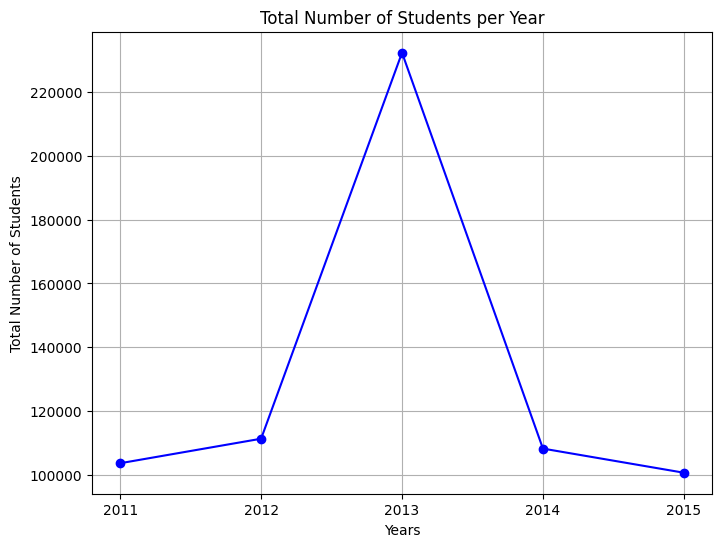

In [27]:
######################## ARIYO ###########################

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

years = [2011, 2012, 2013, 2014, 2015]
grandTotalEntry = districts_df.iloc[-1]
# Extract the required data from the last entry
# using the last entry since it has the grand total of each year
total_students = [
    grandTotalEntry['2011 Total'],
    grandTotalEntry['2012 Total'],
    grandTotalEntry['2013 Total'],
    grandTotalEntry['2014 Total'],
    grandTotalEntry['2015 Total']
]

# Create a plot using Matplotlib
plt.figure(figsize=(8, 6)).gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.plot(years, total_students, marker='o', linestyle='-', color='b')
plt.xlabel('Years')
plt.ylabel('Total Number of Students')
plt.title('Total Number of Students per Year')
plt.grid(True)
plt.show()

### General Perfomance of students


In [28]:
# Plot of percentage of students above average in each year
print(grandTotalEntry)

District_Name      Grand Total
SCHOOL                     NaN
Gender                     NaN
2011 Total            103681.0
%0-5 Points               22.5
%6-10 Points              34.9
%11-15 Points             25.7
%16-20 Points             13.6
%21-25 Points              3.3
2012 Total            111358.0
%0-5 Points.1             20.8
%6-10 Points.1            36.3
%11-15 Points.1           27.1
%16-20 Points.1           12.7
%21-25 Points.1            3.1
2013 Total            232258.0
%0-5 Points.2             37.2
%6-10 Points.2            37.3
%11-15 Points.2           20.4
%16-20 Points.2            5.1
2014 Total            108263.0
%0-5 Points.3             30.8
%6-10 Points.3            36.4
%11-15 Points.3           24.5
%16-20 Points.3            8.4
2015 Total            100705.0
%0-5 Points.4             30.1
%6-10 Points.4            43.0
%11-15 Points.4           20.0
%16-20 Points.4            3.1
Name: 3915, dtype: object


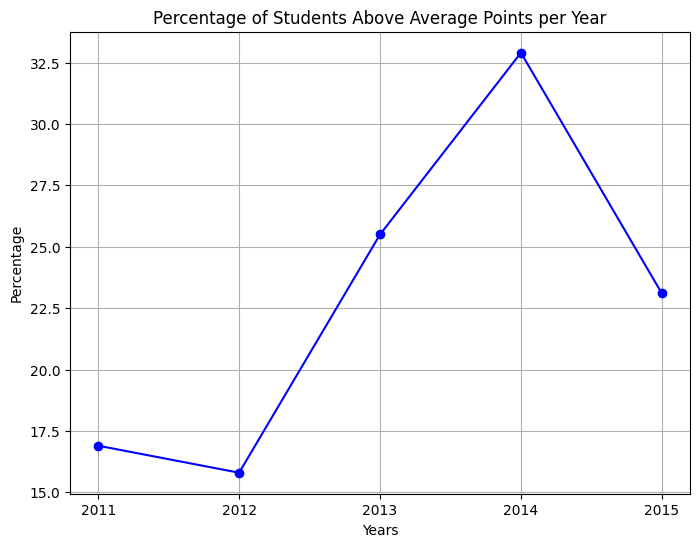

In [29]:
# From the observation above, we see that duplicate columns ie %0-5 Points, %6-10 Points, %11-15 Points, %16-20 Points, %21-25 Points
# Have been appended with .1, .2, .3, .4 for the years after '2011 Total' which are 2012, 2013, 2014, 2015 respectively
# Note also that after 2012, the points moved from 25 to 20

aboveAverage_2011 = grandTotalEntry['%16-20 Points'] + grandTotalEntry['%21-25 Points']
aboveAverage_2012 = grandTotalEntry['%16-20 Points.1'] + grandTotalEntry['%21-25 Points.1']
aboveAverage_2013 = grandTotalEntry['%11-15 Points.2'] + grandTotalEntry['%16-20 Points.2']
aboveAverage_2014 = grandTotalEntry['%11-15 Points.3'] + grandTotalEntry['%16-20 Points.3']
aboveAverage_2015 = grandTotalEntry['%11-15 Points.4'] + grandTotalEntry['%16-20 Points.4']

aboveAveragePerYear = [aboveAverage_2011, aboveAverage_2012, aboveAverage_2013, aboveAverage_2014, aboveAverage_2015]

# Create a plot of Percentage of students above average per year
plt.figure(figsize=(8, 6)).gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.plot(years, aboveAveragePerYear, marker='o', linestyle='-', color='b')
plt.xlabel('Years')
plt.ylabel('Percentage')
plt.title('Percentage of Students Above Average Points per Year')
plt.grid(True)
plt.show()